In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati',
       'variazione_terapia_intensiva', 'variazione_ricoverati_con_sintomi',
       'variazione_totale_ospedalizzati', 'variazione_isolamento_domiciliare',
       'nuovi_dimessi_guariti', 'nuovi_deceduti', 'nuovi_tamponi',
       'nuovi_casi_testati', 'ti_su_to', 'to_su_tp', 'np_su_nt', 'np_su_nct',
       'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [5]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 34282
Nuovi tamponi: 234834.0
Percentuale nuovi positivi/nuovi tamponi: 15.0 %
Nuovi guariti: 24169.0
Nuovi deceduti: 753.0
Variazione positivi ricoverati con sintomi: 430.0
Variazione positivi in terapia intensiva: 58.0
Variazione positivi in isolamento dimiciliare: 8870.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 18, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-19T17:00:00,2380,215,2595,40566,43161,704,1638,217716,35692,...,909.0,24.0,103223.0,60770.0,8.29,6.01,1.59,2.70,3.37,3.858
1,2020-09-20T17:00:00,2365,222,2587,41511,44098,937,1587,218351,35707,...,635.0,15.0,83428.0,54733.0,8.58,5.87,1.90,2.90,3.26,3.677
2,2020-09-21T17:00:00,2475,232,2707,42372,45079,981,1350,218703,35724,...,352.0,17.0,55862.0,39893.0,8.57,6.01,2.42,3.38,4.50,3.061
3,2020-09-22T17:00:00,2604,239,2843,42646,45489,410,1392,219670,35738,...,967.0,14.0,87303.0,49345.0,8.41,6.25,1.59,2.82,3.02,3.088
4,2020-09-23T17:00:00,2658,244,2902,43212,46114,625,1640,220665,35758,...,995.0,20.0,103696.0,63763.0,8.41,6.29,1.58,2.57,2.09,3.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-14T17:00:00,31398,3306,34704,653731,688435,24509,37255,411434,44683,...,12196.0,544.0,227695.0,135117.0,9.53,5.04,16.36,27.57,2.35,5.611
57,2020-11-15T17:00:00,32047,3422,35469,677021,712490,24055,33979,420810,45229,...,9376.0,546.0,195275.0,110731.0,9.65,4.98,17.40,30.69,3.51,4.936
58,2020-11-16T17:00:00,32536,3492,36028,681756,717784,5294,27354,442364,45733,...,21554.0,504.0,152663.0,89082.0,9.69,5.02,17.92,30.71,2.05,3.839
59,2020-11-17T17:00:00,33074,3612,36686,697124,733810,16026,32191,457798,46464,...,15434.0,731.0,208458.0,114933.0,9.85,5.00,15.44,28.01,3.44,4.485


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

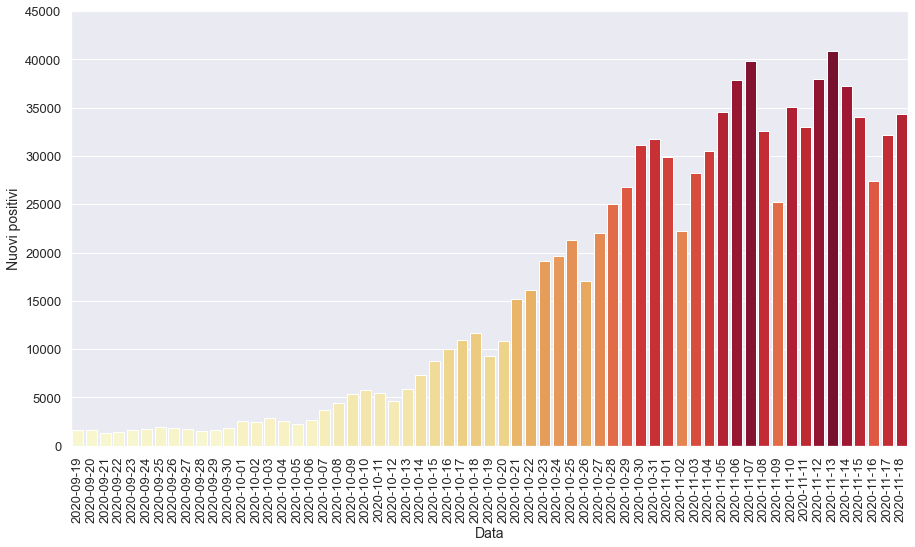

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

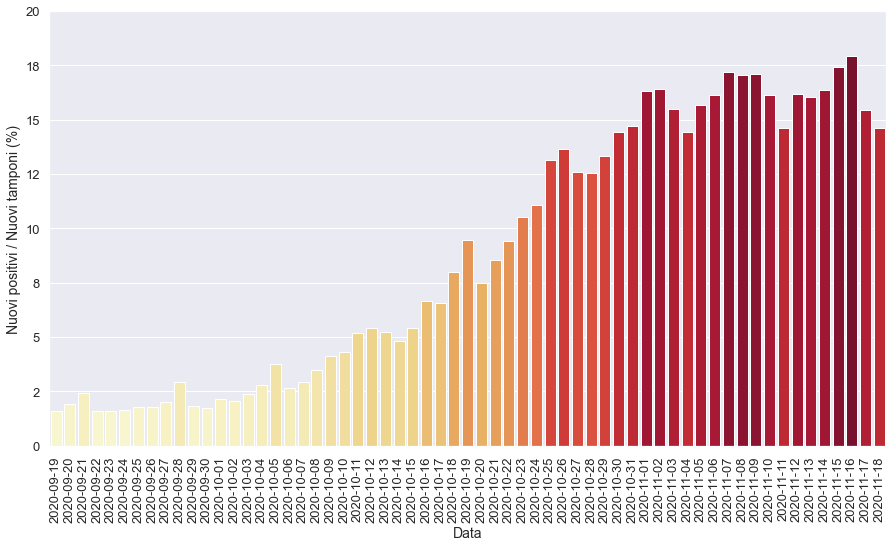

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

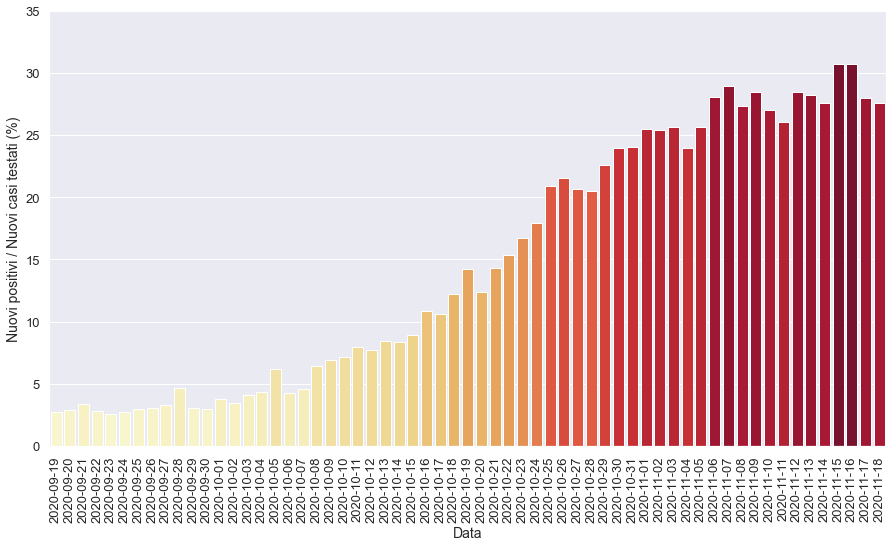

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

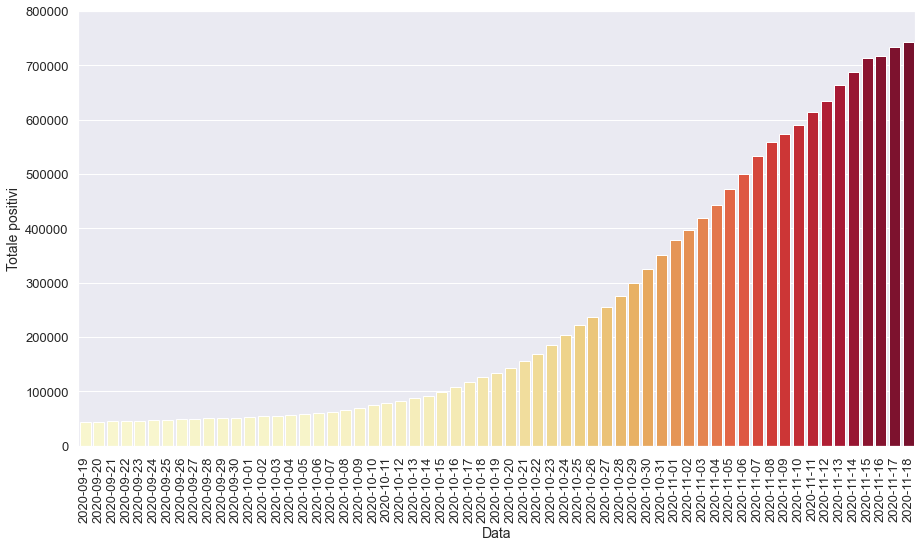

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

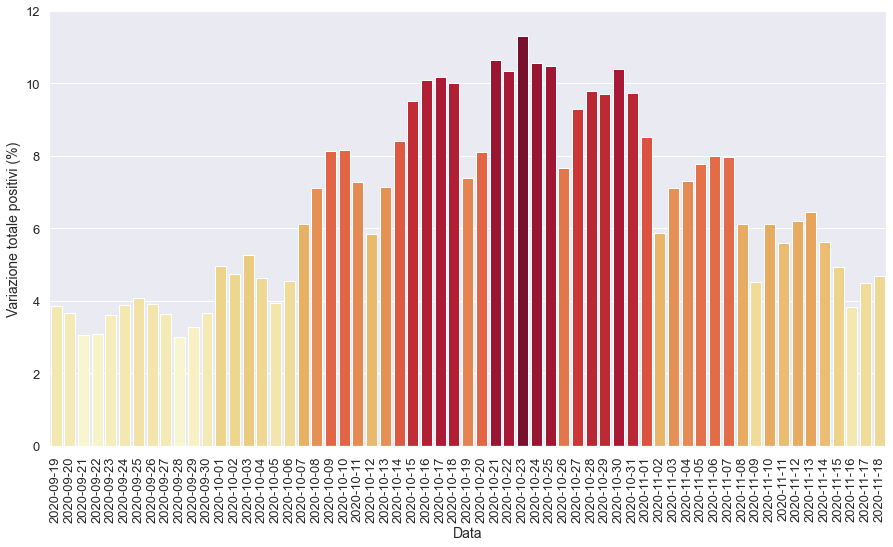

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

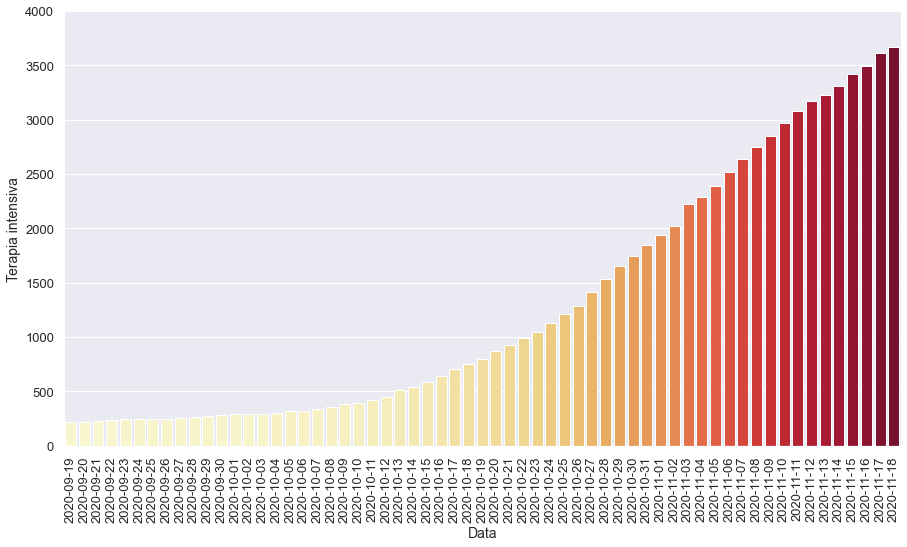

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

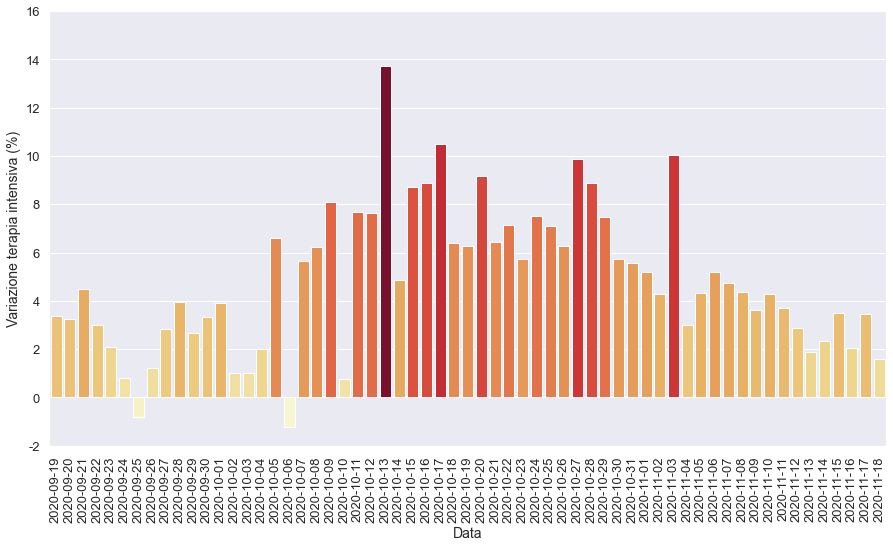

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

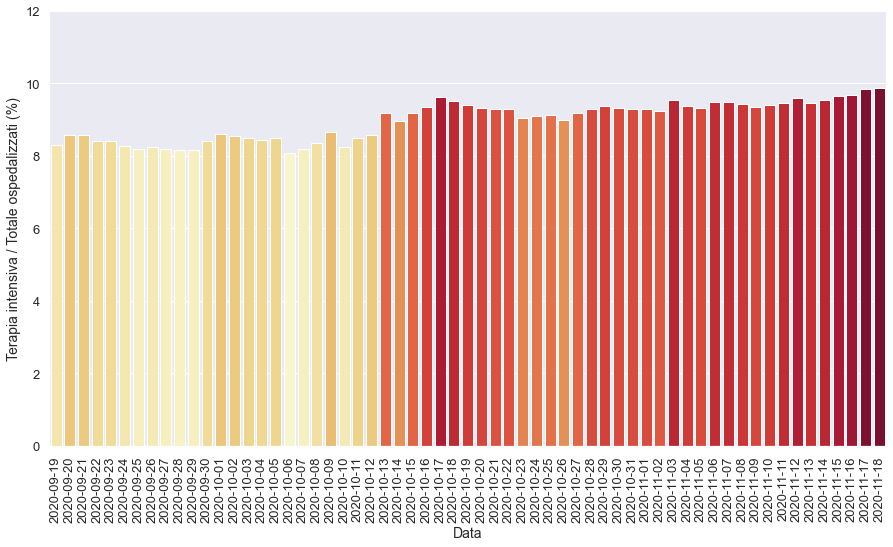

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

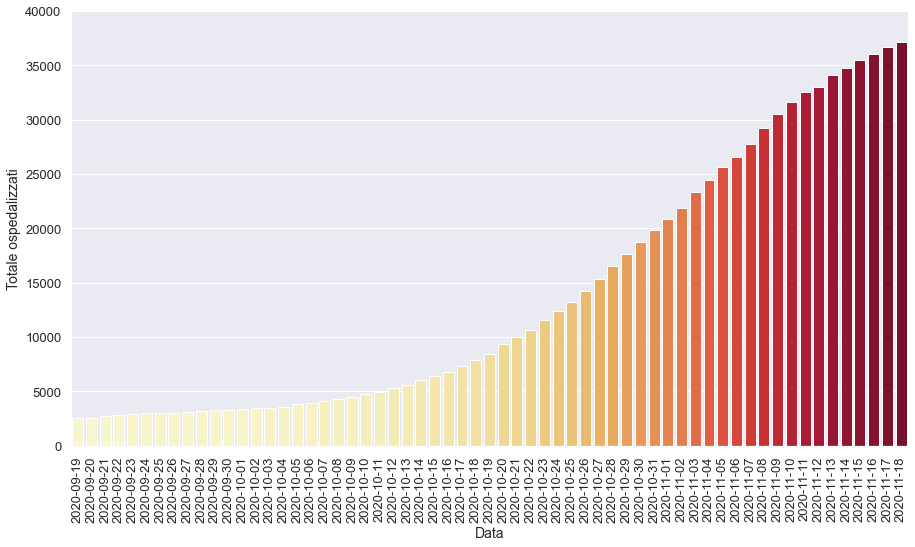

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

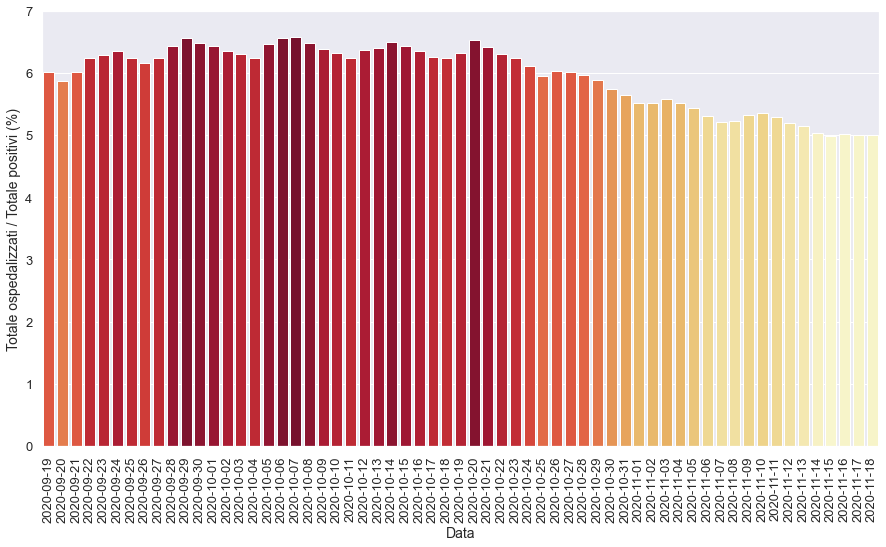

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

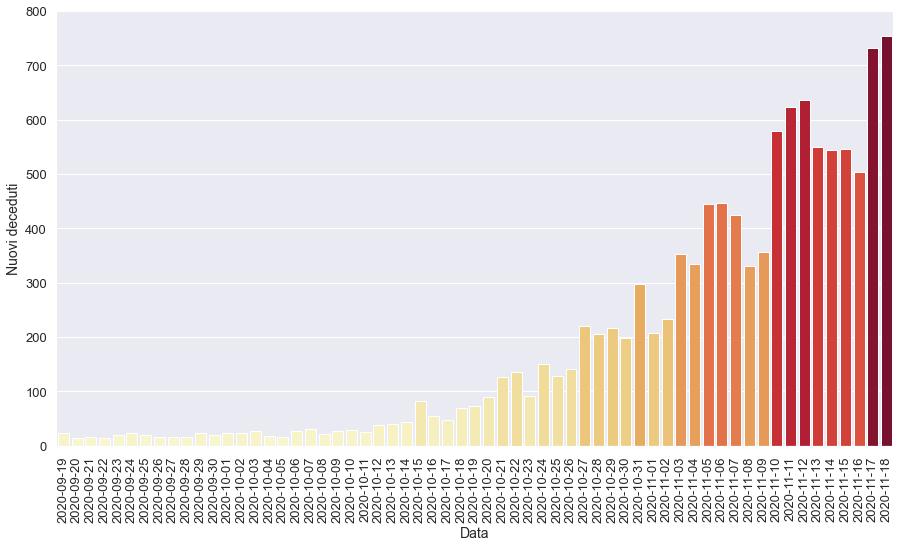

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

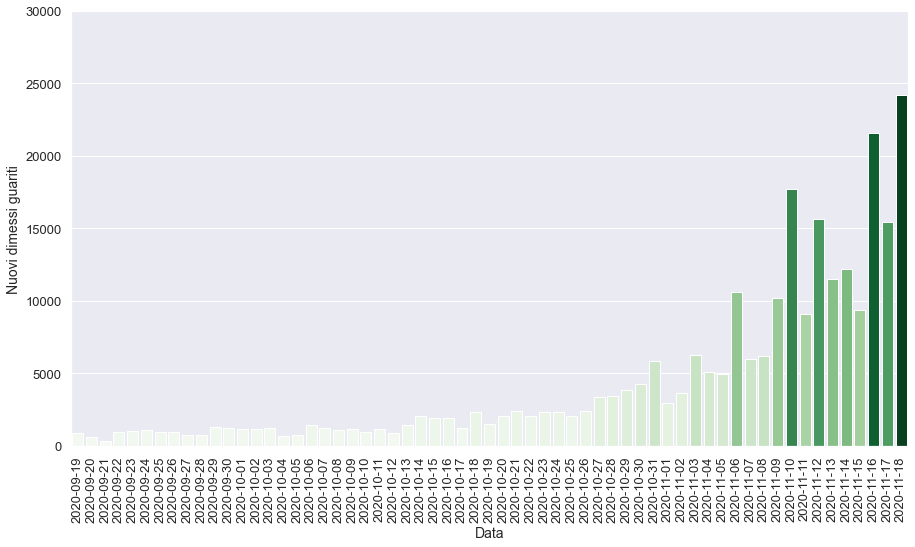

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-19T17:00:00,7676,797,8473,125530,134003,7766,9338,252959,36616,...,1498.0,73.0,98862.0,65824.0,9.41,6.32,9.45,14.19,6.27,7.397
1,2020-10-20T17:00:00,8454,870,9324,133415,142739,8736,10874,255005,36705,...,2046.0,89.0,144737.0,87680.0,9.33,6.53,7.51,12.40,9.16,8.115
2,2020-10-21T17:00:00,9057,926,9983,145459,155442,12703,15199,257374,36832,...,2369.0,127.0,177848.0,106488.0,9.28,6.42,8.55,14.27,6.44,10.648
3,2020-10-22T17:00:00,9694,992,10686,158616,169302,13860,16079,259456,36968,...,2082.0,136.0,170392.0,104872.0,9.28,6.31,9.44,15.33,7.13,10.344
4,2020-10-23T17:00:00,10549,1049,11598,174404,186002,16700,19143,261808,37059,...,2352.0,91.0,182032.0,114499.0,9.04,6.24,10.52,16.72,5.75,11.307
5,2020-10-24T17:00:00,11287,1128,12415,190767,203182,17180,19644,264117,37210,...,2309.0,151.0,177669.0,109673.0,9.09,6.11,11.06,17.91,7.53,10.561
6,2020-10-25T17:00:00,12006,1208,13214,209027,222241,19059,21273,266203,37338,...,2086.0,128.0,161880.0,101876.0,9.14,5.95,13.14,20.88,7.09,10.470
7,2020-10-26T17:00:00,12997,1284,14281,222403,236684,14443,17012,268626,37479,...,2423.0,141.0,124686.0,78816.0,8.99,6.03,13.64,21.58,6.29,7.655
8,2020-10-27T17:00:00,13955,1411,15366,239724,255090,18406,21994,271988,37700,...,3362.0,221.0,174398.0,106346.0,9.18,6.02,12.61,20.68,9.89,9.293
9,2020-10-28T17:00:00,14981,1536,16517,259940,276457,21367,24991,275404,37905,...,3416.0,205.0,198952.0,121820.0,9.30,5.97,12.56,20.51,8.86,9.797


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

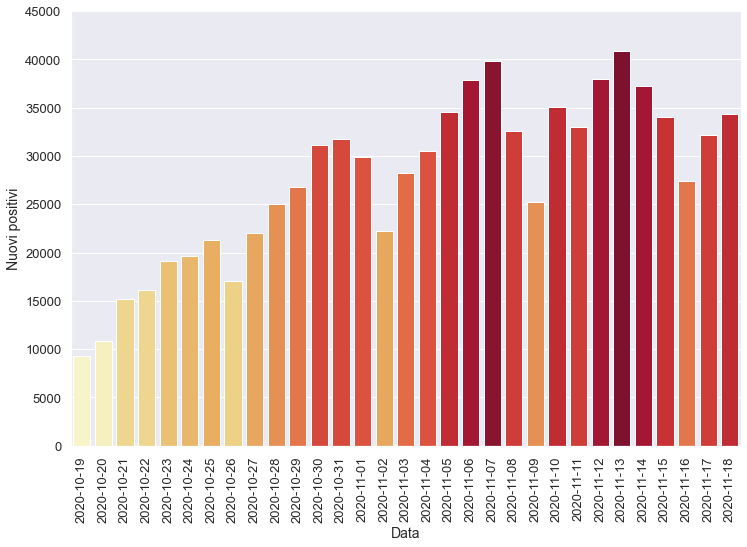

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

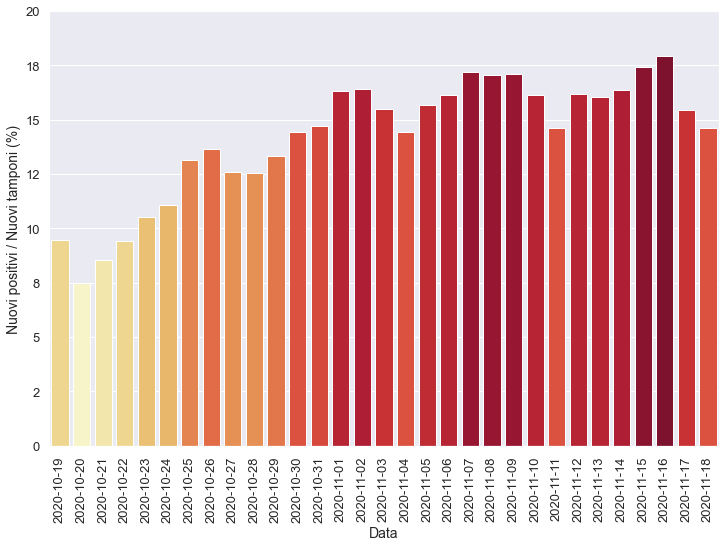

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

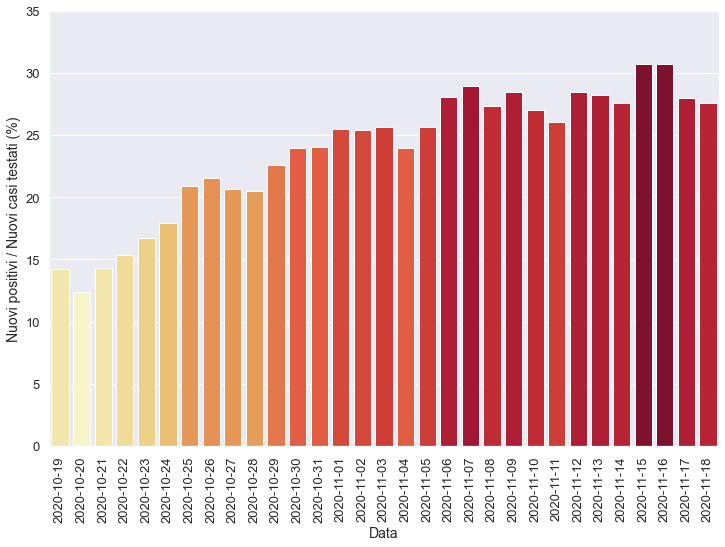

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

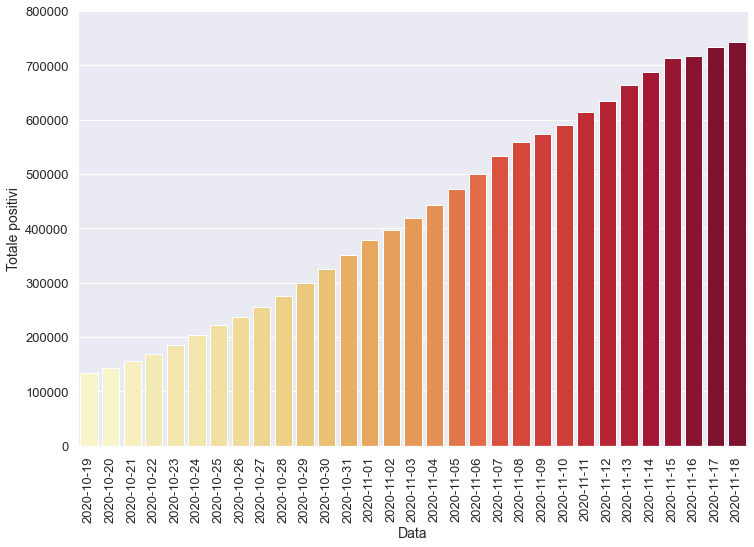

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

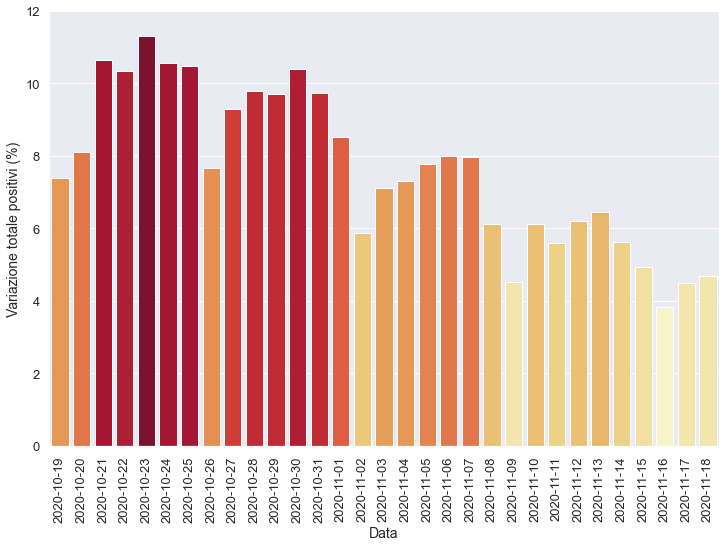

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

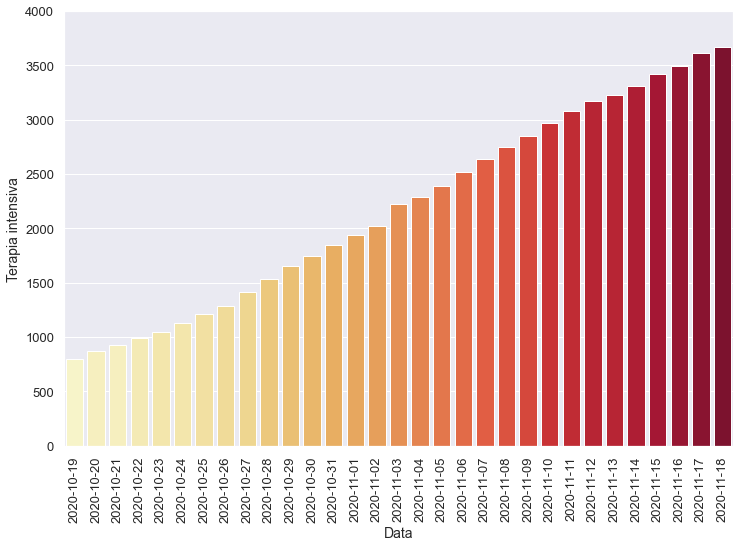

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

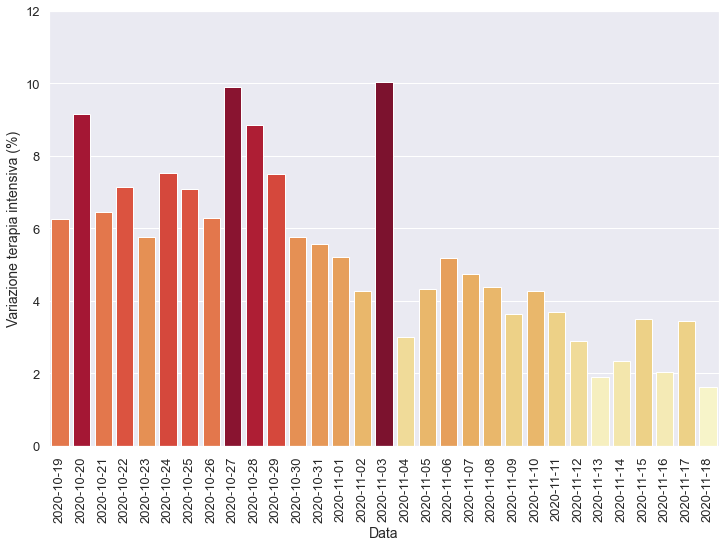

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

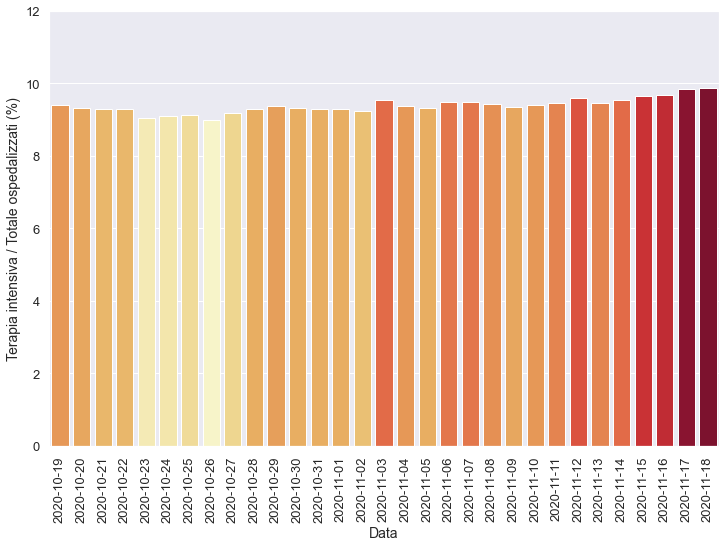

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

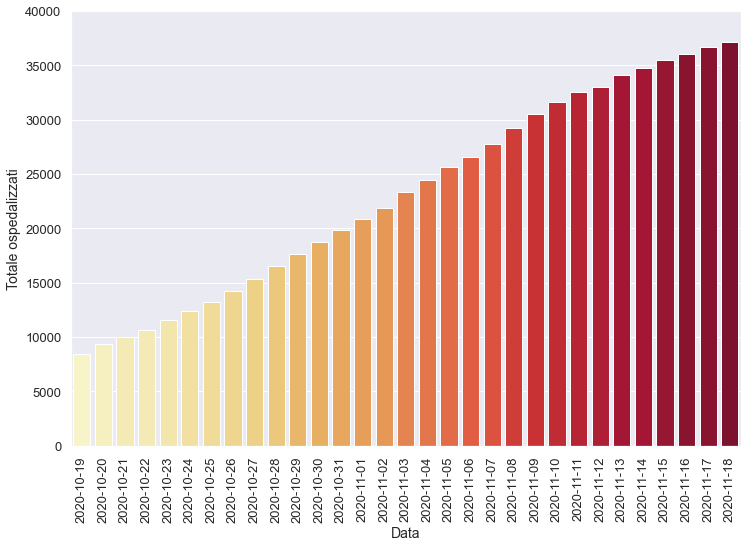

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

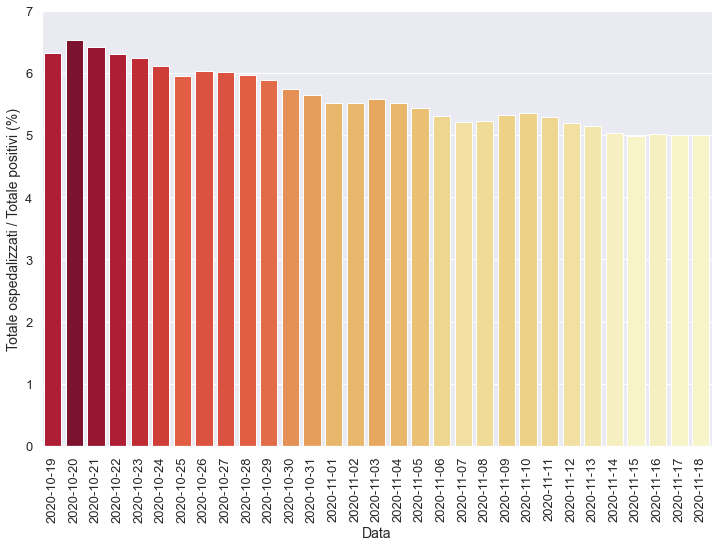

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

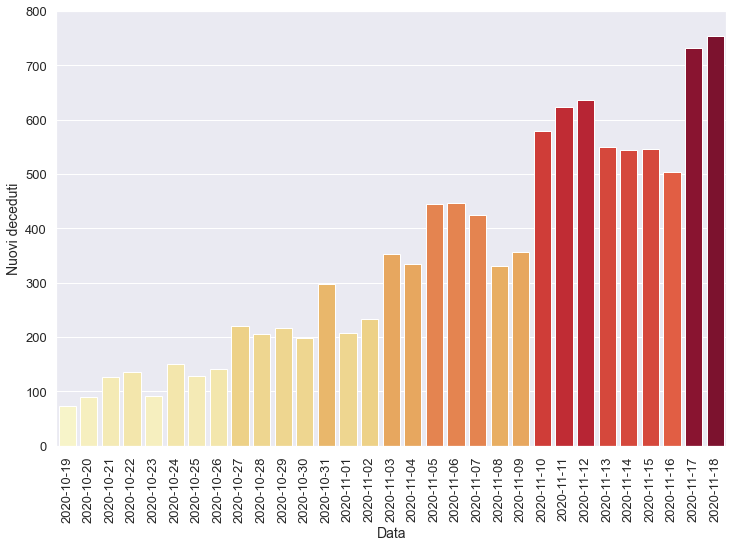

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

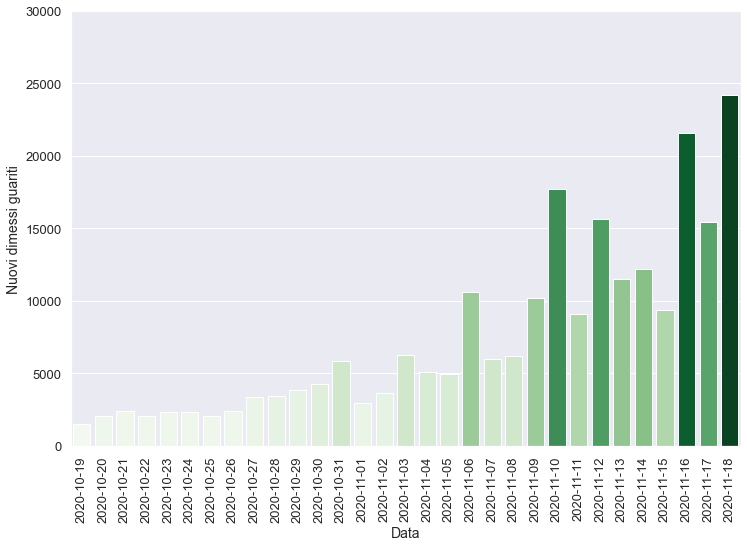

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-11T17:00:00,29444,3081,32525,580833,613358,23248,32961,372113,42953,...,9090.0,623.0,225640.0,126410.0,9.47,5.30,14.61,26.07,3.70,5.586
1,2020-11-12T17:00:00,29873,3170,33043,602011,635054,21696,37978,387758,43589,...,15645.0,636.0,234672.0,133478.0,9.59,5.20,16.18,28.45,2.89,6.192
2,2020-11-13T17:00:00,30914,3230,34144,629782,663926,28872,40902,399238,44139,...,11480.0,550.0,254908.0,144875.0,9.46,5.14,16.05,28.23,1.89,6.441
3,2020-11-14T17:00:00,31398,3306,34704,653731,688435,24509,37255,411434,44683,...,12196.0,544.0,227695.0,135117.0,9.53,5.04,16.36,27.57,2.35,5.611
4,2020-11-15T17:00:00,32047,3422,35469,677021,712490,24055,33979,420810,45229,...,9376.0,546.0,195275.0,110731.0,9.65,4.98,17.40,30.69,3.51,4.936
5,2020-11-16T17:00:00,32536,3492,36028,681756,717784,5294,27354,442364,45733,...,21554.0,504.0,152663.0,89082.0,9.69,5.02,17.92,30.71,2.05,3.839
6,2020-11-17T17:00:00,33074,3612,36686,697124,733810,16026,32191,457798,46464,...,15434.0,731.0,208458.0,114933.0,9.85,5.00,15.44,28.01,3.44,4.485
7,2020-11-18T17:00:00,33504,3670,37174,705994,743168,9358,34282,481967,47217,...,24169.0,753.0,234834.0,124237.0,9.87,5.00,14.60,27.59,1.61,4.672


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

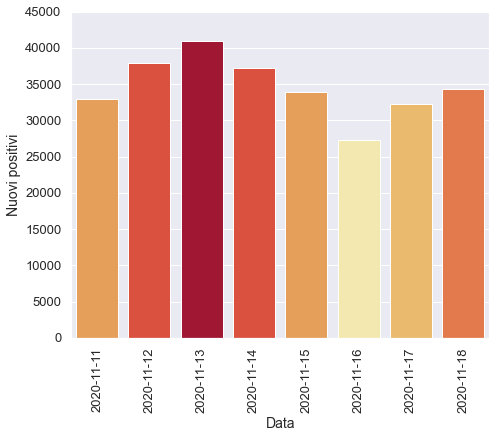

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

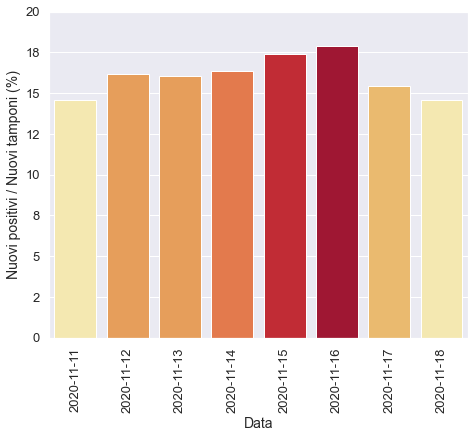

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

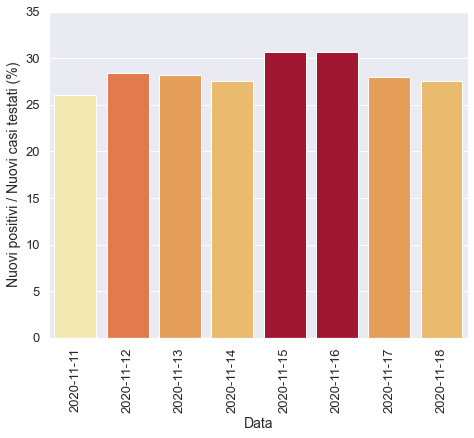

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

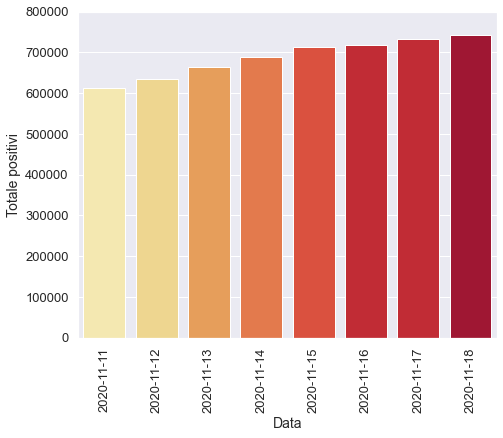

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

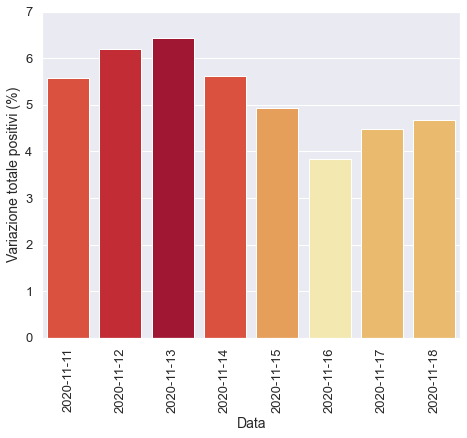

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

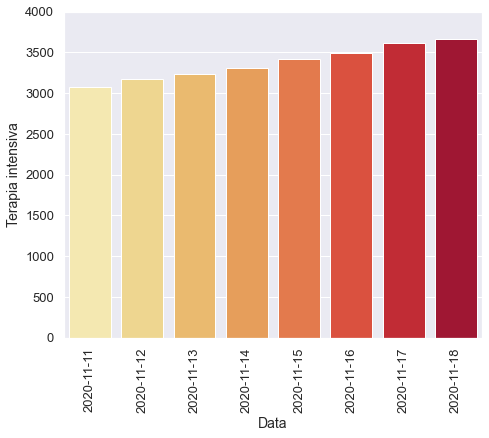

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

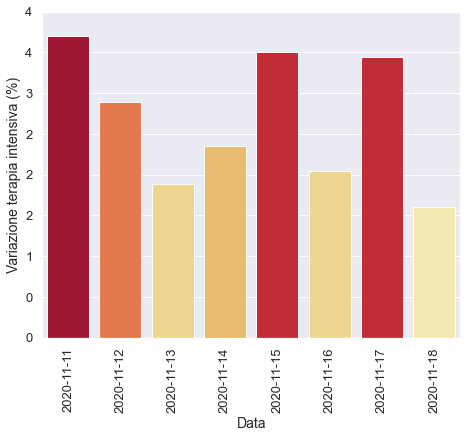

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

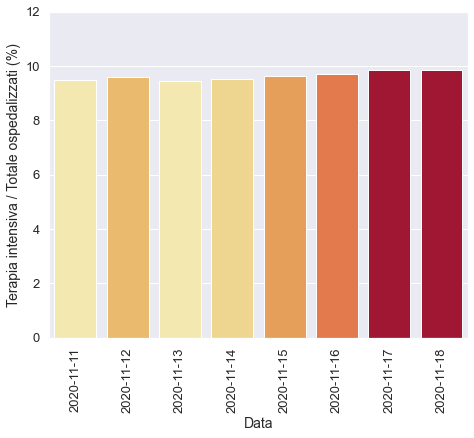

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

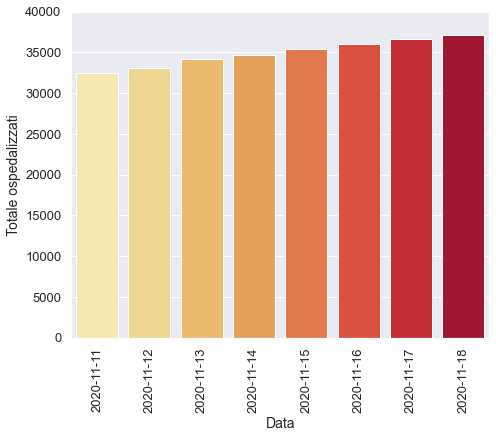

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

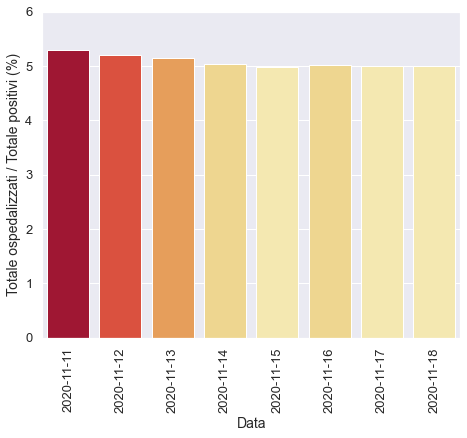

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

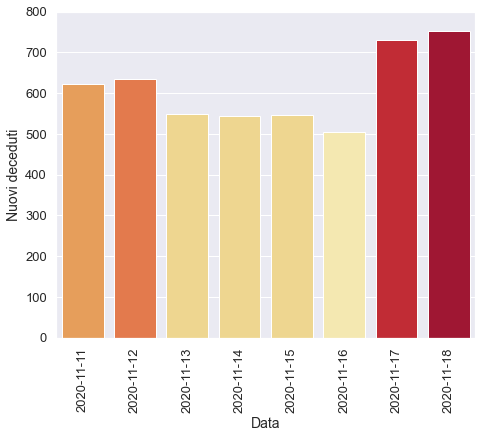

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

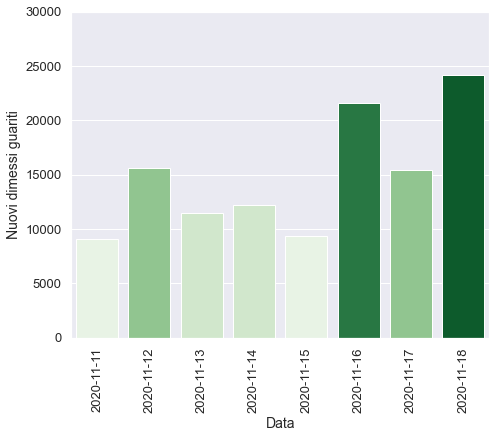

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)